In [31]:
os.getcwd()

'C:\\Users\\ganga\\OneDrive\\Desktop\\project'

In [32]:
os.chdir('C:\\Users\\ganga\\OneDrive\\Desktop\\project\\')
os.getcwd()

'C:\\Users\\ganga\\OneDrive\\Desktop\\project'

In [33]:
df = pd.read_csv('Titanic-Dataset.csv', encoding='ISO-8859-1')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(2)
memory usage: 71.5+ KB


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# Data Cleaning
# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
else:
    print("'Embarked' column not found.")
df['Fare'] = df['Fare'].fillna(df['Fare'].median())


In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [40]:
# Convert categorical variables to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [74]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",1,24.0,0,0,248733,13.0,False,True


In [56]:
# Frequency distribution for 'Sex'
sex_freq = df['Sex'].value_counts()
print("Frequency distribution for Sex:\n", sex_freq)

Frequency distribution for Sex:
 Sex
0    577
1    314
Name: count, dtype: int64


In [57]:
# Frequency distribution for 'Pclass'
pclass_freq = df['Pclass'].value_counts()
print("Frequency distribution for Pclass:\n", pclass_freq)

Frequency distribution for Pclass:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [42]:
# Exploratory Data Analysis (EDA)
# Summary statistics
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


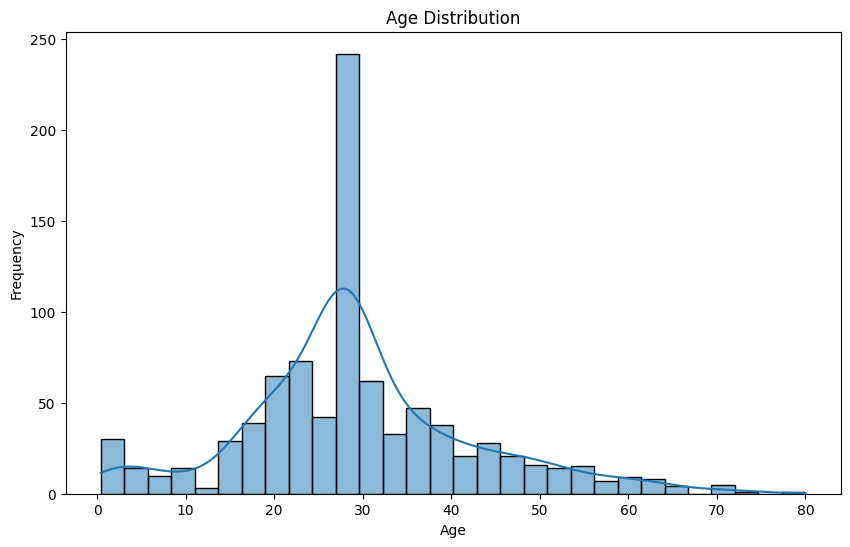

In [43]:
# Visualize the distribution of key variables
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

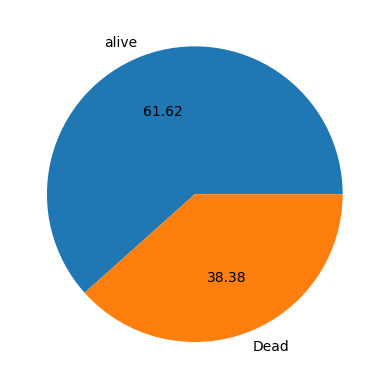

In [49]:
import matplotlib.pyplot as plt
plt.pie(df['Survived'].value_counts(), labels=['alive','Dead'],autopct="%0.2f")
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

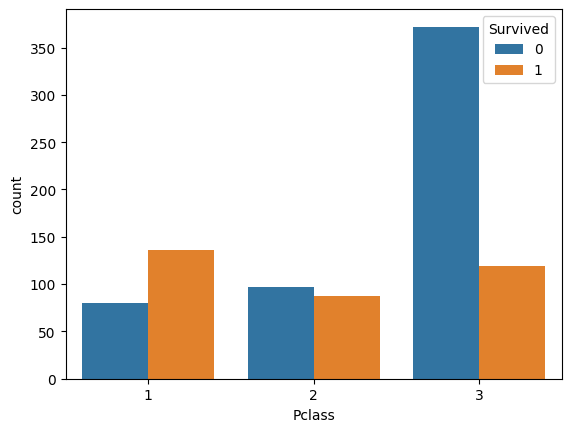

In [50]:
sns.countplot(x='Pclass',hue='Survived',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

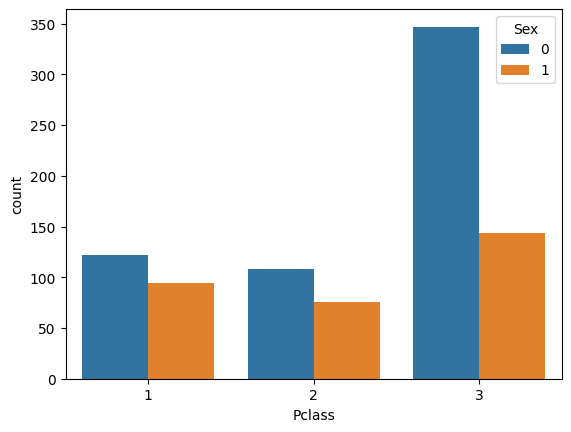

In [65]:
# Stacked bar chart of pclass by sex
sns.countplot(x='Pclass',hue='Sex',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

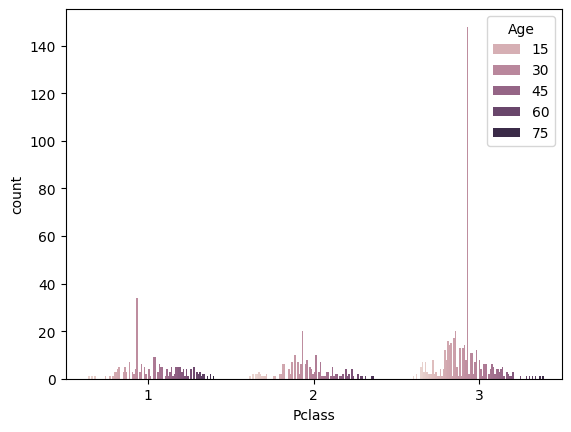

In [59]:
sns.countplot(x='Pclass',hue='Age',data=df)

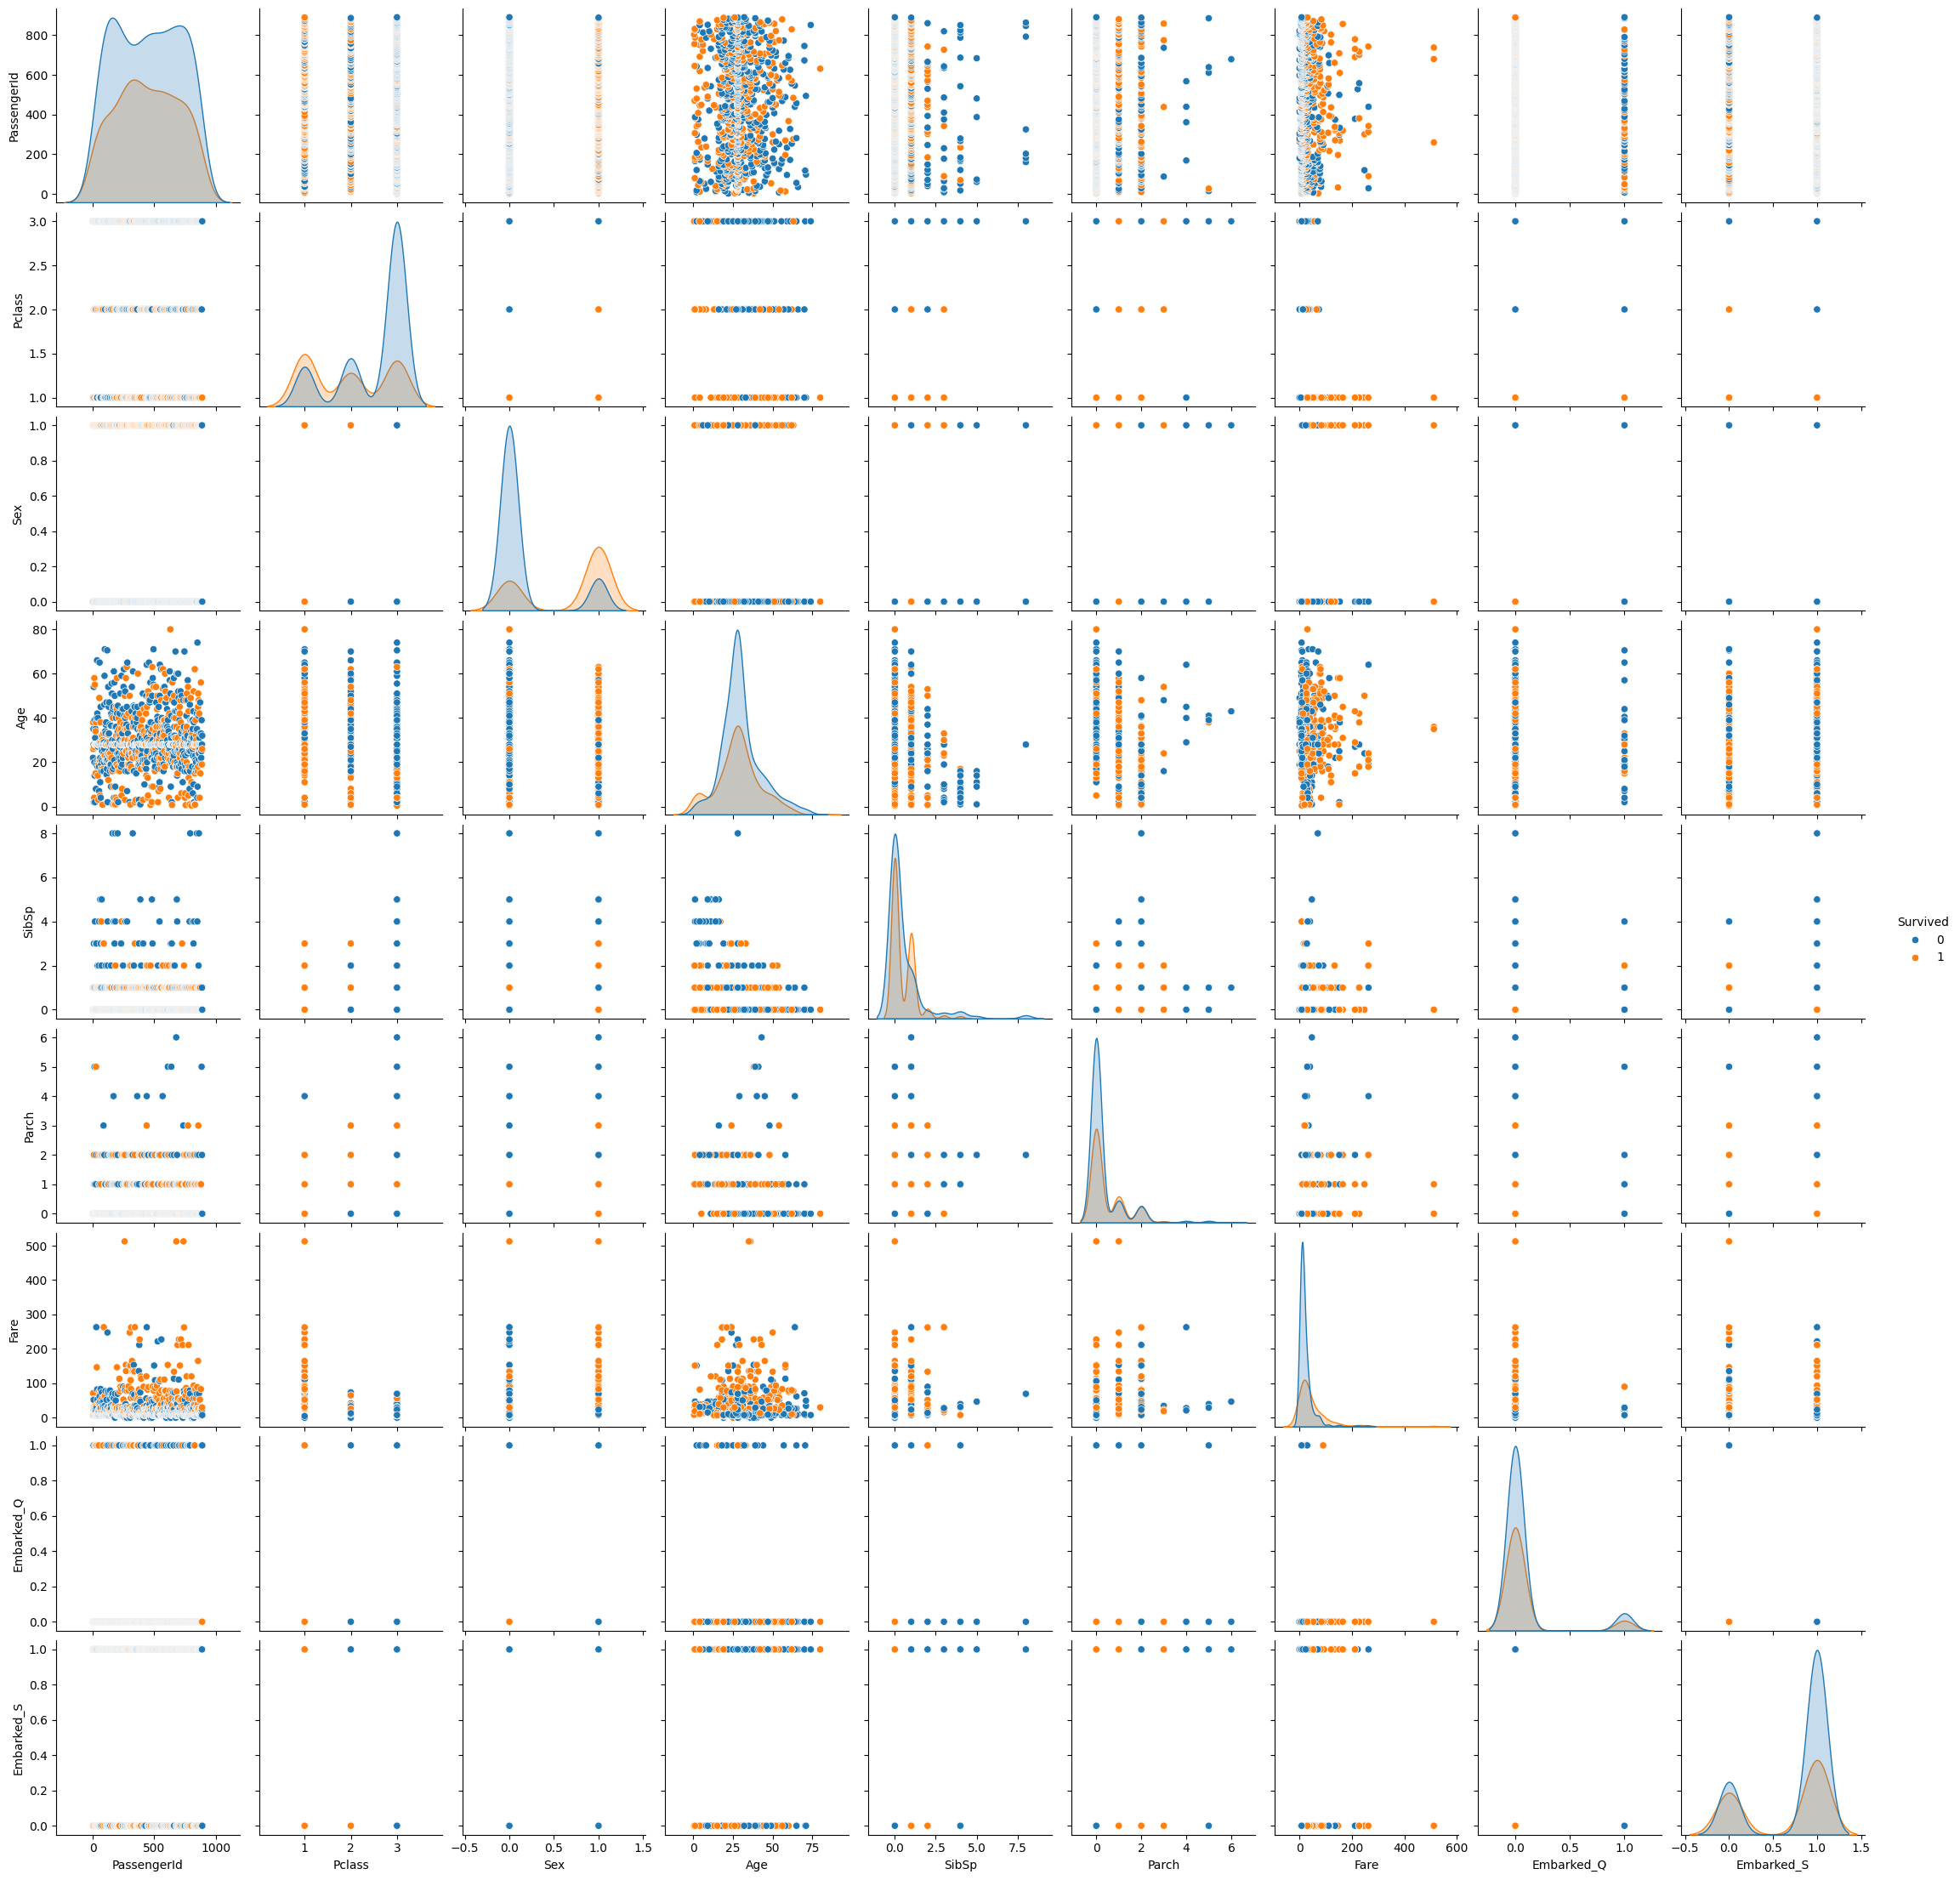

In [51]:
sns.pairplot(df,hue='Survived')

In [61]:
corr_matrix = df[['Age', 'Pclass']].corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
             Age    Pclass
Age     1.000000 -0.339898
Pclass -0.339898  1.000000


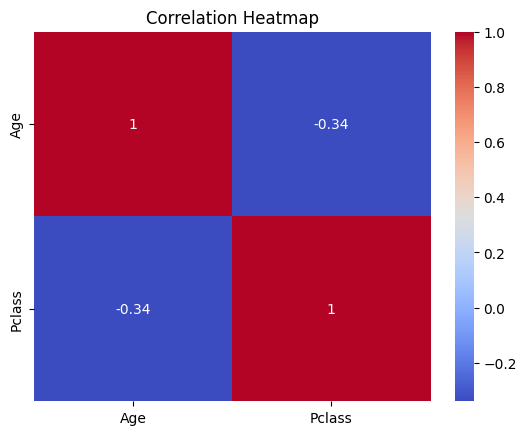

In [62]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [66]:
corr_matrix = df[['Age', 'Sex']].corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
          Age       Sex
Age  1.000000 -0.081163
Sex -0.081163  1.000000


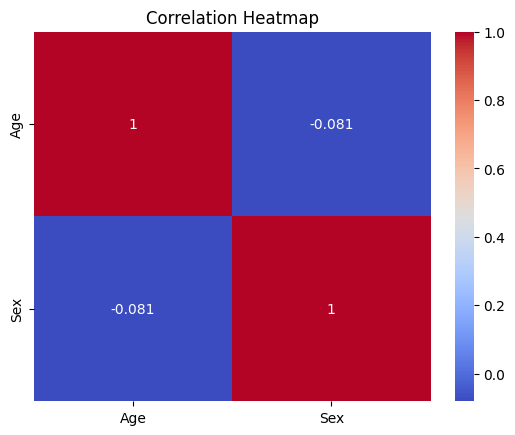

In [67]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [68]:
corr_matrix = df[['Pclass', 'Sex']].corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
        Pclass     Sex
Pclass  1.0000 -0.1319
Sex    -0.1319  1.0000


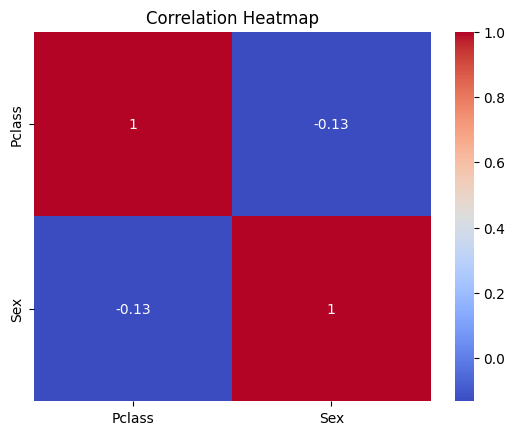

In [69]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<Axes: ylabel='Count'>

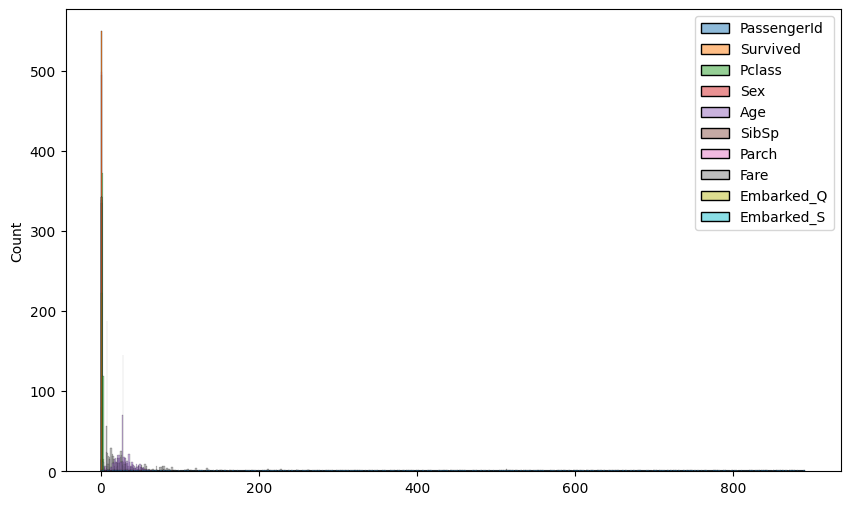

In [52]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['Survived'] == 0])
sns.histplot(df[df['Survived'] == 1])

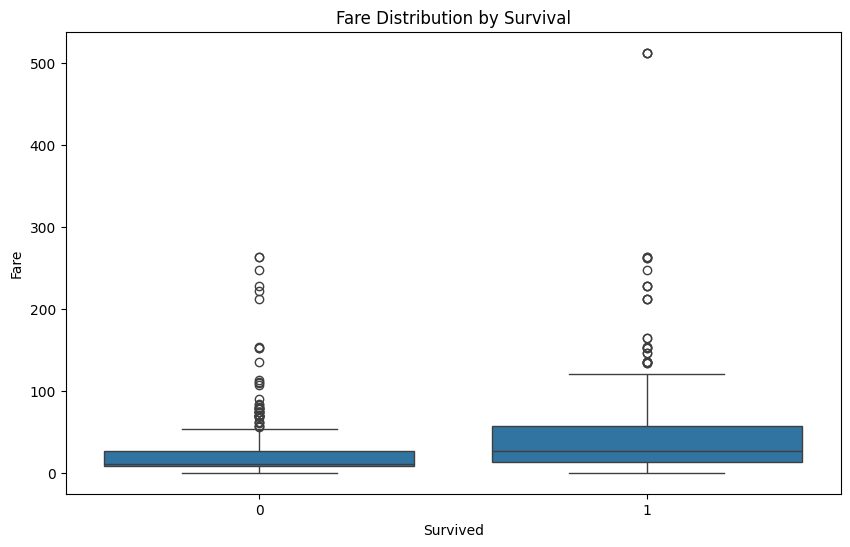

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

In [53]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
print(df['Sex'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64


In [58]:
# Calculate the correlation coefficient between 'Age' and 'Pclass'
correlation_coefficient = df['Age'].corr(df['Pclass'])
print("Correlation coefficient between Age and Pclass:", correlation_coefficient)


Correlation coefficient between Age and Pclass: -0.33989832839258544


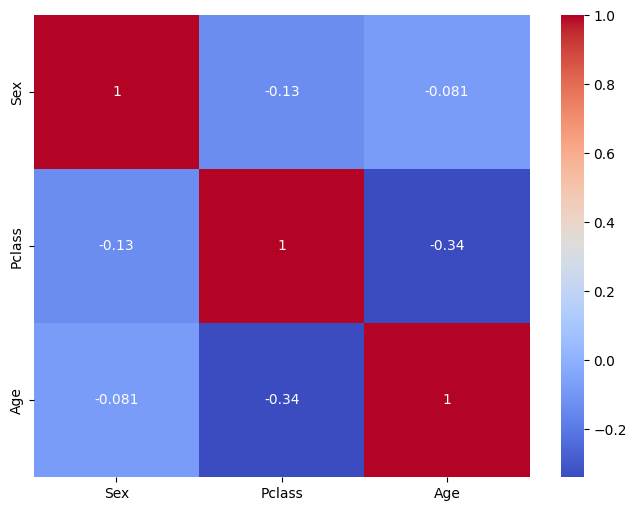

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'sex', 'pclass', and 'age' variables
correlation_matrix = df[['Sex', 'Pclass', 'Age']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [71]:
#  Outlier Detection
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Age'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR)]
outlier_df = outliers[['Age']]
print("Outliers in Age:")
print(outlier_df)

Outliers in Age:
       Age
7     2.00
11   58.00
15   55.00
16    2.00
33   66.00
..     ...
827   1.00
829  62.00
831   0.83
851  74.00
879  56.00

[66 rows x 1 columns]


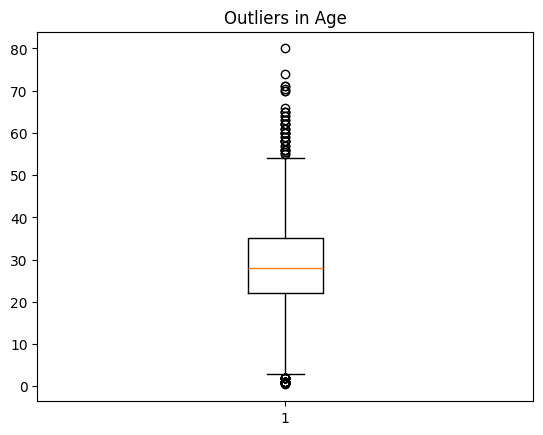

In [72]:
import matplotlib.pyplot as plt

# Create a boxplot to visualize the outliers in Age
plt.boxplot(df['Age'])
plt.title('Outliers in Age')
plt.show()